

* Nama     : La Liani 
* Program  : FTDS18-rmt
* Tugas     : GC2 



Grade challenge kali ini, kita akan menganalisis sebuah pengerjaan sistem pembuangan sampah di kota Austin. kita akan menggunakan analisis deskriptif dan inferensial. data yang digunakan adalah data public yakni data waste_and_diversion pada dataset austin_waste. 


SELECT report_date,load_time, load_type, load_weight, dropoff_site FROM `bigquery-public-data.austin_waste.waste_and_diversion` 
 where report_date <= "2021-07-09" and  report_date >= "2021-01-01" order by report_date DESC

A. Impor semua package yang diperlukan dan sekaligus dengan load data

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy 
from numpy import percentile
import pandas as pd
import sympy as sy
import scipy.stats.stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/bq-results-20230210-055621-1676008602607/h8dsft_P0GC2_<la_liani.csv")
data

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-07-09,2021-07-09 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
...,...,...,...,...,...
26152,2021-01-02,2021-01-02 10:00:00 UTC,RECYCLING - SINGLE STREAM,9980.0,BALCONES RECYCLING
26153,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
26154,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
26155,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK


## PROBLEM 1(STATISTIK)

jawaban poin 1. pertama tama kita melihat info data secara keseluruhan dan ternyata data nya masih memuat missing value.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


tampak pada kolom "load_weight" memiliki nilai missing value yang akan ditangani dengan menggunakan teknik tertentu.

jawaban poin 2

In [4]:
data["report_date"].value_counts() # untuk mengetahui tanggal berapa aja yang berulang sehingga kita akan menjumlahkan  data "load_weight".
                                   

2021-02-25    277
2021-03-08    273
2021-03-22    258
2021-02-24    257
2021-03-10    256
             ... 
2021-01-30      5
2021-01-01      4
2021-05-30      1
2021-04-18      1
2021-02-07      1
Name: report_date, Length: 166, dtype: int64

jika melihat dari dropoff site di bawah maka saya lebih memilih dropoff_site TDS LANDFILL karena site ini yang paling banyak didatangi untuk proses pembuangan sampah

In [5]:
data["dropoff_site"].value_counts()# untuk mengetahui data pada kolom "dropoff_site" yang berulang

TDS LANDFILL             10694
ORGANICS BY GOSH          5755
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1655
ONION CREEK                813
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 75
GREAT NORTHERN              70
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
ST. EDWARDS                  1
WESTFIELD                    1
STEINER LANDFILL             1
BALCONES WOODS               1
WILCAB                       1
Name: dropoff_site, dtype: int64

In [6]:
data["load_type"].value_counts() # mengetahui tipe load sampah 

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED ORGANICS           1
CONTAMINATED RECYCLING          1
Name: load_type, dtype: int64

dari sini kita dapat melihat bahwa tipe load sampah yang paling banyak adalah garbage collection kemudian diikuti tpe load sampah recycling-single stream, tipe load sampah organik, bulk, brush dan lain lain. maka buat pemerintah bisa menambah site baru untuk jenis sampah yang disebutkan diatas

jawaban poin 3. untuk menjawab pertanyaan nomor 3 perlu melalui langkah langkah sebagai berikut:

B. Cleaning Data. data di atas masih ada dalam bentuk kategori dengan format objek atau string  sehingga perlu untuk dikonvert sehingga menjadi data numerik dengan format integer atau float64. package python yang digunakan adalah scikit-learn. kenapa dikonvert karena dalam analisis suatu algoritma hanya mengerti data numerik.

In [7]:
# kolom yang digunakan adalah kolom "load_type" dan "dropoff_site" sedangkan kolom "load_time" tidak dianalisis

kategorical_kolom = ["load_type", "dropoff_site"]
numeric_kolom =["load_weight"]


In [8]:
def one_hot_encoder(data, kolom):  # membuat fungsi untuk mengkonvert data kategorik menjadi data numerik
 label = LabelEncoder()
 a =label.fit_transform(data[kolom]).reshape(-1,1)
 ohe = OneHotEncoder(sparse=False)
 nama_kolom = [kolom+ "_"+ str(i) for i in label.classes_]
 return(pd.DataFrame(ohe.fit_transform(a),columns=nama_kolom))


In [9]:
numeric_kolom =["load_weight"] # data dibagi menjadi dua yakni data kategorik dan data numerik dimana data kategorik akan dikonvert dan akan digabung
data_new2 = data[numeric_kolom] # dengan data numerik. data numerik yakni data pada kolom "load_weight"

In [10]:
kategorical_kolom = ["load_type", "dropoff_site",] # cara menggabungkan kedua data tersebut
for kolom in kategorical_kolom:
    data_new = one_hot_encoder(data,kolom)
    data_new2 = pd.concat([data_new2,data_new],axis=1)
    

In [11]:
data_new2

,load_weight,load_type_BRUSH,load_type_BULK,load_type_CONTAMINATED ORGANICS,load_type_CONTAMINATED RECYCLING,load_type_DEAD ANIMAL,load_type_GARBAGE COLLECTIONS,load_type_LITTER,load_type_MIXED LITTER,load_type_ORGANICS,...,dropoff_site_ONION CREEK,dropoff_site_ORGANICS BY GOSH,dropoff_site_PARK BEND,dropoff_site_PARK CENTER,dropoff_site_ST. EDWARDS,dropoff_site_STEINER LANDFILL,dropoff_site_TDS - MRF,dropoff_site_TDS LANDFILL,dropoff_site_WESTFIELD,dropoff_site_WILCAB
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26152,9980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26153,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26154,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26155,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data_new2["load_weight"].isnull().value_counts()

False    25109
True      1048
Name: load_weight, dtype: int64

In [13]:

print ('STD: ' + str(data_new2['load_weight'].std())) # mecari nilai aggregate dengan fungsi aggregate
print ('Min: ' + str(data_new2['load_weight'].min()))
print ('Mode: ' + str(data_new2['load_weight'].mode()[0]))
print ('Median: ' + str(data_new2['load_weight'].median().round(2)))
print ('Mean: ' + str(data_new2['load_weight'].mean().round(2)))
print ('Max: ' + str(data_new2['load_weight'].max()))

STD: 7135.059564662526
Min: 0.0
Mode: 5500.0
Median: 11300.0
Mean: 12227.14
Max: 245540.0


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


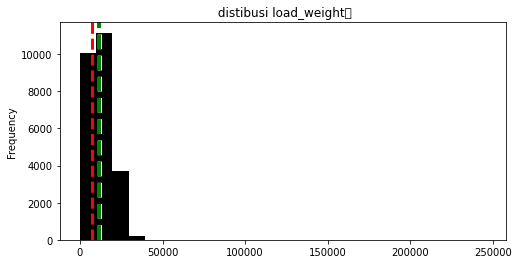

In [14]:
load_weight	 = data_new2['load_weight']
load_weight.plot.hist(title=' distibusi load_weight	', color='black', bins=25, figsize = (8,4))  
plt.axvline(load_weight.mean(), color='white', linestyle='dashed', linewidth=4)
plt.axvline(load_weight.median(), color='green', linestyle='dashed', linewidth=4)
plt.axvline(load_weight.std(), color='red', linestyle='dashed', linewidth=3)

plt.show()


data terdistribusi cukup normal karena nilai median dan mean hampir sama dan berhimpit jika dilihat dari bar di atas. tidak ada skewness kiri ataupun  skewness kanan.

In [15]:
data_new2.load_weight.quantile([0.25,0.50,0.75])

0.25     7060.0
0.50    11300.0
0.75    16380.0
Name: load_weight, dtype: float64

In [16]:
pd.DataFrame(data_new2["load_weight"].quantile([0.25,0.50,0.75]))

,load_weight
0.25,7060.0
0.50,11300.0
0.75,16380.0


karena distribusi datanya cukup normal yakni nilai mean dan median hampir sama atau hampir berhimpit jika dilihat pada bar diatas yang cukup simetris sehingga untuk mengganti nilai missing value kita bisa gunakan mean.

In [17]:
data_new2["load_weight"]= data_new2["load_weight"].fillna(data_new2["load_weight"].mean())
data_new2

,load_weight,load_type_BRUSH,load_type_BULK,load_type_CONTAMINATED ORGANICS,load_type_CONTAMINATED RECYCLING,load_type_DEAD ANIMAL,load_type_GARBAGE COLLECTIONS,load_type_LITTER,load_type_MIXED LITTER,load_type_ORGANICS,...,dropoff_site_ONION CREEK,dropoff_site_ORGANICS BY GOSH,dropoff_site_PARK BEND,dropoff_site_PARK CENTER,dropoff_site_ST. EDWARDS,dropoff_site_STEINER LANDFILL,dropoff_site_TDS - MRF,dropoff_site_TDS LANDFILL,dropoff_site_WESTFIELD,dropoff_site_WILCAB
0,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26152,9980.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26153,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26154,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26155,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data_new2["load_weight"].value_counts()

12227.136307     1048
5500.000000        65
10420.000000       49
12460.000000       45
11420.000000       45
                 ... 
31920.000000        1
17570.000000        1
19450.000000        1
227780.000000       1
14450.000000        1
Name: load_weight, Length: 1782, dtype: int64

kita akan melihat sebaran data setelah nilai missing value diganti dengan nilai mean. dari bar di bawah dapat disimpulkan bahwa setelah mising value diganti dengan nilai mean tenyata nilai rata rata dan median juga tidak terlalu berbeda dengan data sebelum diganti nilai missing value

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


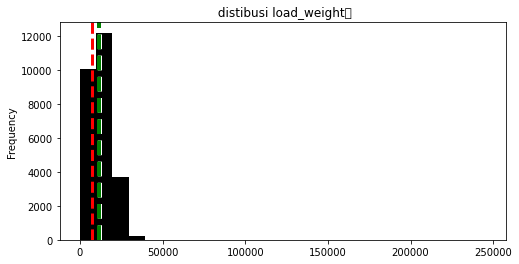

In [19]:
load_weight	 = data_new2['load_weight']
load_weight.plot.hist(title=' distibusi load_weight	', color='black', bins=25, figsize = (8,4))  
plt.axvline(load_weight.mean(), color='white', linestyle='dashed', linewidth=4)
plt.axvline(load_weight.median(), color='green', linestyle='dashed', linewidth=4)
plt.axvline(load_weight.std(), color='red', linestyle='dashed', linewidth=3)

plt.show()

In [20]:
print ('STD: ' + str(data_new2['load_weight'].std())) # mecari nilai aggregate dengan fungsi aggregate
print ('Min: ' + str(data_new2['load_weight'].min()))
print ('Mode: ' + str(data_new2['load_weight'].mode()[0]))
print ('Median: ' + str(data_new2['load_weight'].median()))
print ('Mean: ' + str(data_new2['load_weight'].mean().round(2)))
print ('Max: ' + str(data_new2['load_weight'].max()))

STD: 6990.657078734252
Min: 0.0
Mode: 12227.136307276274
Median: 11580.0
Mean: 12227.14
Max: 245540.0


cara menginsert kolom report_date yang sebelumnya tidak dimasukan karena proses konvert sebelumnya.

In [21]:
data_new2["report_date"] = data["report_date"]  
           

In [22]:
data_new2

,load_weight,load_type_BRUSH,load_type_BULK,load_type_CONTAMINATED ORGANICS,load_type_CONTAMINATED RECYCLING,load_type_DEAD ANIMAL,load_type_GARBAGE COLLECTIONS,load_type_LITTER,load_type_MIXED LITTER,load_type_ORGANICS,...,dropoff_site_ORGANICS BY GOSH,dropoff_site_PARK BEND,dropoff_site_PARK CENTER,dropoff_site_ST. EDWARDS,dropoff_site_STEINER LANDFILL,dropoff_site_TDS - MRF,dropoff_site_TDS LANDFILL,dropoff_site_WESTFIELD,dropoff_site_WILCAB,report_date
0,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-07-09
1,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-07-09
2,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-07-09
3,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-07-09
4,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-07-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26152,9980.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-02
26153,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-01
26154,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-01
26155,12227.136307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-01


In [23]:
# membuat list untuk data dikelompokan berdasarkan tanggal
data_new2 = data_new2.groupby(["report_date"])[["load_weight", "load_type_BRUSH", "load_type_BULK", "load_type_CONTAMINATED ORGANICS",
                                                "load_type_CONTAMINATED RECYCLING","load_type_DEAD ANIMAL" ,"load_type_GARBAGE COLLECTIONS",
                                                "load_type_LITTER",  "load_type_MIXED LITTER",  "load_type_ORGANICS",  "load_type_RECYCLED METAL",
                                                "dropoff_site_AUSTIN WOOD RECYCLING",  "dropoff_site_BALCONES RECYCLING",  "dropoff_site_BALCONES WOODS",
                                                "dropoff_site_GREAT NORTHERN",  "dropoff_site_HORNSBY BEND",  "dropoff_site_MRF",
                                                "dropoff_site_ON ROUTE HIGH DUMP",  "dropoff_site_ONION CREEK",  "dropoff_site_PARK BEND",
                                                "dropoff_site_PARK CENTER",  "dropoff_site_ST. EDWARDS",  "dropoff_site_STEINER LANDFILL",  
                                                "dropoff_site_TDS - MRF",  "dropoff_site_TDS LANDFILL",  "dropoff_site_WESTFIELD",  
                                                "dropoff_site_WILCAB",  "dropoff_site_ORGANICS BY GOSH"]].sum()      

In [24]:
data_new2

,load_weight,load_type_BRUSH,load_type_BULK,load_type_CONTAMINATED ORGANICS,load_type_CONTAMINATED RECYCLING,load_type_DEAD ANIMAL,load_type_GARBAGE COLLECTIONS,load_type_LITTER,load_type_MIXED LITTER,load_type_ORGANICS,...,dropoff_site_ONION CREEK,dropoff_site_PARK BEND,dropoff_site_PARK CENTER,dropoff_site_ST. EDWARDS,dropoff_site_STEINER LANDFILL,dropoff_site_TDS - MRF,dropoff_site_TDS LANDFILL,dropoff_site_WESTFIELD,dropoff_site_WILCAB,dropoff_site_ORGANICS BY GOSH
report_date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,4.890855e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-02,2.206811e+06,0.0,3.0,0.0,0.0,1.0,53.0,0.0,2.0,36.0,...,3.0,0.0,0.0,0.0,0.0,2.0,59.0,0.0,0.0,36.0
2021-01-04,2.920260e+06,7.0,16.0,0.0,0.0,2.0,82.0,0.0,1.0,32.0,...,0.0,0.0,0.0,0.0,0.0,54.0,105.0,0.0,0.0,32.0
2021-01-05,2.400767e+06,6.0,12.0,0.0,0.0,1.0,71.0,0.0,1.0,31.0,...,1.0,0.0,0.0,0.0,0.0,58.0,87.0,0.0,0.0,31.0
2021-01-06,2.457686e+06,8.0,8.0,0.0,0.0,2.0,69.0,0.0,2.0,27.0,...,5.0,0.0,0.0,0.0,0.0,1.0,81.0,0.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-05,1.897290e+06,4.0,18.0,0.0,0.0,1.0,58.0,0.0,3.0,29.0,...,0.0,0.0,0.0,0.0,0.0,29.0,80.0,0.0,0.0,29.0
2021-07-06,1.995003e+06,9.0,16.0,0.0,0.0,2.0,59.0,0.0,2.0,32.0,...,6.0,0.0,0.0,0.0,0.0,33.0,81.0,0.0,0.0,32.0
2021-07-07,1.663124e+06,8.0,18.0,0.0,0.0,2.0,56.0,0.0,0.0,31.0,...,9.0,0.0,0.0,0.0,0.0,2.0,78.0,0.0,0.0,31.0


In [25]:
 data_new2.sort_values("report_date", axis = 0, ascending = False) # data disort berdasarkan tanggal dari yang paling lama ke paling baru

,load_weight,load_type_BRUSH,load_type_BULK,load_type_CONTAMINATED ORGANICS,load_type_CONTAMINATED RECYCLING,load_type_DEAD ANIMAL,load_type_GARBAGE COLLECTIONS,load_type_LITTER,load_type_MIXED LITTER,load_type_ORGANICS,...,dropoff_site_ONION CREEK,dropoff_site_PARK BEND,dropoff_site_PARK CENTER,dropoff_site_ST. EDWARDS,dropoff_site_STEINER LANDFILL,dropoff_site_TDS - MRF,dropoff_site_TDS LANDFILL,dropoff_site_WESTFIELD,dropoff_site_WILCAB,dropoff_site_ORGANICS BY GOSH
report_date,,,,,,,,,,,,,,,,,,,,,
2021-07-09,1.814757e+05,19.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2021-07-08,1.552148e+06,12.0,17.0,0.0,0.0,0.0,45.0,0.0,0.0,30.0,...,11.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0,30.0
2021-07-07,1.663124e+06,8.0,18.0,0.0,0.0,2.0,56.0,0.0,0.0,31.0,...,9.0,0.0,0.0,0.0,0.0,2.0,78.0,0.0,0.0,31.0
2021-07-06,1.995003e+06,9.0,16.0,0.0,0.0,2.0,59.0,0.0,2.0,32.0,...,6.0,0.0,0.0,0.0,0.0,33.0,81.0,0.0,0.0,32.0
2021-07-05,1.897290e+06,4.0,18.0,0.0,0.0,1.0,58.0,0.0,3.0,29.0,...,0.0,0.0,0.0,0.0,0.0,29.0,80.0,0.0,0.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06,2.457686e+06,8.0,8.0,0.0,0.0,2.0,69.0,0.0,2.0,27.0,...,5.0,0.0,0.0,0.0,0.0,1.0,81.0,0.0,0.0,27.0
2021-01-05,2.400767e+06,6.0,12.0,0.0,0.0,1.0,71.0,0.0,1.0,31.0,...,1.0,0.0,0.0,0.0,0.0,58.0,87.0,0.0,0.0,31.0
2021-01-04,2.920260e+06,7.0,16.0,0.0,0.0,2.0,82.0,0.0,1.0,32.0,...,0.0,0.0,0.0,0.0,0.0,54.0,105.0,0.0,0.0,32.0


mencari nilai IQR untuk menentukan dari sebaran data apakah data memiliki outlier atau tidak

In [26]:
Q3 = 16380.00
Q1 = 7060.00
IQR = Q3-Q1 

Lower_Bound = Q1 - 1.5*IQR
Lower_Bound

-6920.0

In [27]:
Upper_Bound = Q3 + 1.5*IQR
Upper_Bound

30360.0

karena nilai minimum dan nilai maximum tidak melewati batas lower bound dan upper bound maka dapat disimpulkan bahwa data pada kolom "load_weight tidak ada outlier.

jawaban poin 4.  site yang menarik menurut saya adalah TDS LANDFILL karena site ini paling banyak menjadi tempat pembuangan sampah. 

jawaban poin 5. 

In [88]:
data2 = data_new2[["load_weight", "dropoff_site_TDS LANDFILL"]] # memilih kedua kolom diatas karena disesuaikan perintah soal
data2

,load_weight,dropoff_site_TDS LANDFILL
report_date,,
2021-01-01,4.890855e+04,0.0
2021-01-02,2.206811e+06,59.0
2021-01-04,2.920260e+06,105.0
2021-01-05,2.400767e+06,87.0
2021-01-06,2.457686e+06,81.0
...,...,...
2021-07-05,1.897290e+06,80.0
2021-07-06,1.995003e+06,81.0
2021-07-07,1.663124e+06,78.0


kita seleksi dan mengambil baris pada kolom "load_weight" dengan cara memilih baris yang tidak ada element nol pada kolom "dropoff_site_TDS LANDFILL"

In [89]:
data2[(data2["load_weight"] > 0.0 ) & (data2["dropoff_site_TDS LANDFILL"] != 0.0) ]

,load_weight,dropoff_site_TDS LANDFILL
report_date,,
2021-01-02,2.206811e+06,59.0
2021-01-04,2.920260e+06,105.0
2021-01-05,2.400767e+06,87.0
2021-01-06,2.457686e+06,81.0
2021-01-07,2.523920e+06,80.0
...,...,...
2021-07-05,1.897290e+06,80.0
2021-07-06,1.995003e+06,81.0
2021-07-07,1.663124e+06,78.0


In [90]:
print ('STD: ' + str(data2['load_weight'].std())) # mecari nilai aggregate dengan fungsi aggregate
print ('Min: ' + str(data2['load_weight'].min()))
print ('Mode: ' + str(data2['load_weight'].mode()[0]))
print ('Median: ' + str(data2['load_weight'].median().round(2)))
print ('Mean: ' + str(data2['load_weight'].mean().round(2)))
print ('Max: ' + str(data2['load_weight'].max()))

STD: 973374.8648935825
Min: 2040.0
Mode: 2040.0
Median: 2256047.82
Mean: 1926657.86
Max: 3745180.0


In [91]:
pd.DataFrame(data2["load_weight"].quantile([0.25,0.50,0.75]))

,load_weight
0.25,1.802604e+06
0.50,2.256048e+06
0.75,2.526729e+06


In [92]:
Q3 = 2.526729e+06
Q1 = 1.802604e+06
IQR = Q3-Q1 

Lower_Bound = Q1 - 1.5*IQR
Lower_Bound



716416.5

In [93]:
Upper_Bound = Q3 + 1.5*IQR
Upper_Bound

3612916.5

Berdasarkan hasil analisis diatas dapat dinyatakan bahwa data load_weight mengandung outlier karena nilai upper bound adalah 3612916.5 sedangkan nilai maksimumnya adalah 3745180.0

In [124]:
 data3 = data2.sort_values("load_weight", axis = 0, ascending = False) # untuk mengetahui apakah ada berapa outlier yang lebih dari 3612916.5 
 data3

,load_weight,dropoff_site_TDS LANDFILL
report_date,,
2021-02-22,3.745180e+06,125.0
2021-02-25,3.440436e+06,115.0
2021-02-24,3.388933e+06,115.0
2021-03-08,3.328766e+06,100.0
2021-03-09,3.245670e+06,78.0
...,...,...
2021-05-29,4.726141e+04,3.0
2021-02-19,3.288000e+04,8.0
2021-02-07,1.418000e+04,1.0


menghitung berapa persentasi outlier

In [116]:
 persentasi_outlier = (1/166)
 persentasi_outlier 

0.006024096385542169

membuang outlier terlebih dahulu

In [128]:
data4 = data3.drop(data3.index[0:1])
data4

,load_weight,dropoff_site_TDS LANDFILL
report_date,,
2021-02-25,3.440436e+06,115.0
2021-02-24,3.388933e+06,115.0
2021-03-08,3.328766e+06,100.0
2021-03-09,3.245670e+06,78.0
2021-02-23,3.240780e+06,119.0
...,...,...
2021-05-29,4.726141e+04,3.0
2021-02-19,3.288000e+04,8.0
2021-02-07,1.418000e+04,1.0


In [134]:
print ('STD: ' + str(data4['load_weight'].std().round(2))) # mecari nilai aggregate dengan fungsi aggregate
print ('Min: ' + str(data4['load_weight'].min()))
print ('Mode: ' + str(data4['load_weight'].mode()[0]))
print ('Median: ' + str(data4['load_weight'].median().round(2)))
print ('Mean: ' + str(data4['load_weight'].mean().round(2)))
print ('Max: ' + str(data4['load_weight'].max().round(2)))

STD: 965892.76
Min: 2040.0
Mode: 2040.0
Median: 2235315.64
Mean: 1915636.51
Max: 3440435.68


jawaban poin 6

In [135]:
range = 3440435.68 - 2040.0
range
STD = 965892.76

In [138]:
range

3438395.68

In [137]:
variance = STD**2
variance

932948823820.4176

 jawaban poin 7. saran yang bisa diberikan kepada pemerintah adalah terkait penambahan site baru adalah lebih meperhatikan load_weight setiap kali pengangkutan untuk memudahkan memperdiksi penambahan site berikutnya jika sudah diperlukan. analisis hanya menggunakan satu site saja yakni dropoff_site_TDS LANDFILL.

jawaban poin 8. 

C. Analisis Data. analisis data menggunakan uji-t. baik uji paired_test atau uji-t yang lain.

uji ini untuk membandingkan apakah ada perbedaan rata rata load_weight pada dropoff_site_TDS LANDFILL.

## Problem 2(math/calculus)



Pada permasalahan yang sama, pemerintah ingin tau berapa banyak load sampah dalam kg di kota Austin di hari berikutnya (10 Juli 2021). Dalam hal ini, pemerintah menginginkan kamu melakukan forecasting untuk memprediksi nilai di masa depan. Ada banyak teknik forecasting yang bisa dilakukan tapi kamu tidak perlu khawatir, kita akan menggunakan yang metode yang sangat sederhana yaitu menggunakan rumus kecepatan.

Asumsikan bahwa laju penambahan sampah tiap harinya dapat ditulis menggunakan rumus berikut:

In [41]:
x = sy.Symbol("x")

v = sy.Symbol("v")
w = sy.Symbol("w")

In [ ]:
waktu = data_new2